In [1]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os


# Получаем абсолютный путь к директории, где находится ноутбук
notebook_dir = os.path.abspath('')
# Добавляем путь к родительской директории в sys.path
if notebook_dir not in sys.path:
    sys.path.append(notebook_dir)
    
from helper.functionanalyzer import FunctionAnalyzer # Пользовательская функция для анализа функций


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

if sys.version_info <= (3, 12):
    try:
        import nvmath
    except ImportError:
        print("Модуль nvmath не установлен для Python <= 3.12")
else:
    print(f"Модуль nvmath требует Python <= 3.12. Текущая версия: {sys.version_info.major}.{sys.version_info.minor}")



Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Модуль nvmath требует Python <= 3.12. Текущая версия: 3.13


In [2]:
import numpy as np
from scipy.stats import randint

Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно (собственно, это как раз пример с пирожными):

In [9]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)

pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого xi вероятность того, что случайная величина примет значение xi или меньше:

In [10]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

# [0.16666667 0.33333333 0.5 0.66666667 0.83333333 1]

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


Теперь давайте попробуем с помощью функций Python решить другую задачу.

?

Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.

Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [11]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


В результате получаем 0.2 — это вероятность того, что выигрыш получит кто-то, чей порядковый номер — от 1 до 50. Разумеется, вероятность не зависит от самого номера, поэтому для номеров с 51 по 100 вероятность будет ровно такая же.

Давайте разберём задачу на применение этого распределения Бернулли ↓

?

Вы стреляете по мишени в тире. Вероятность попасть составляет 0.6. В случае успеха вы выиграете плюшевого медведя стоимостью 3000 рублей, а в случае промаха — не выиграете ничего. У вас есть только один выстрел.

Какой должна быть стоимость билета, чтобы игра была честной, то есть чтобы цена билета равнялась ожидаемому выигрышу, а значит, не уводила в убыток продавца или вас при большом количестве выстрелов?

Пусть случайная величина X принимает значение 1, если вы попали, и 0, если промахнулись. Тогда ожидаемое число попаданий равно:


1∗0.6+0∗0.4=0.6

Ожидаемый выигрыш:

0.6∗3000+0.4∗0=1800

Получаем, что «справедливая» стоимость билета должна быть равна 1800 рублей.

С помощью специальной функции bernoulli.rvs() из библиотеки scipy мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

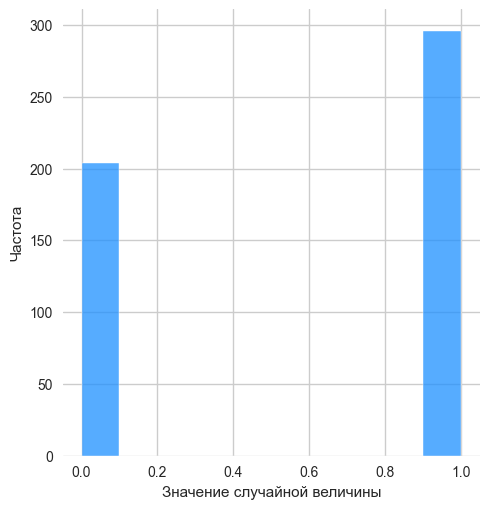

In [20]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500, p=0.6)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Также можно вывести количество неудач и попаданий в нашей модели:

In [21]:

unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)


[[  0 204]
 [  1 296]]


Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

Для решения этой задачи мы уже будем использовать формулу $P(X = k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}$ и вычислять вероятность того, что за день производится от восьми до десяти небракованных изделий:

$$\begin{pmatrix} 10 \\ 8 \end{pmatrix} (0.8)^8 (0.2)^2 + \begin{pmatrix} 10 \\ 9 \end{pmatrix} (0.8)^9 (0.2)^1 + \begin{pmatrix} 10 \\ 10 \end{pmatrix} (0.8)^{10} \approx 0.678$$

In [22]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

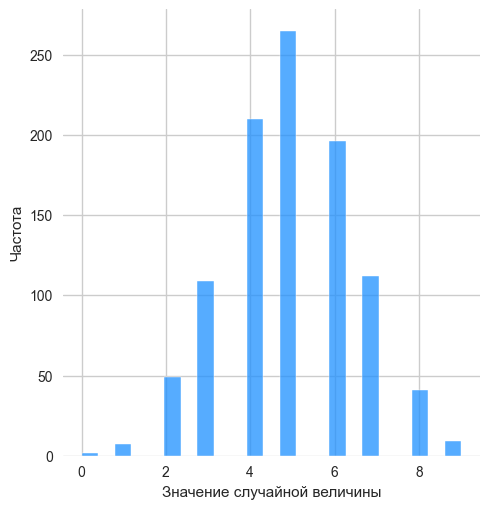

In [23]:
from numpy import random
import seaborn as sns

data = random.binomial(n=10, p=0.5, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Можно видеть, что чаще всего можно наблюдать пять успешных исходов.



### Задание 8.3

1 point possible (graded)
Вы стреляете по мишени. Вероятность набрать максимальное количество очков составляет 7 %. В этом случае вы выиграете плюшевого медведя стоимостью 5000 рублей. Если наберёте меньше максимума, то не выиграете ничего.

Сколько должен стоить билет, чтобы обеспечить игру, в которой выигрыш равен вашим ожидаемым затратам и ожидаемым затратам продавца?

Пусть случайная величина X принимает значение 1, если вы попали, и 0, если промахнулись. Тогда ожидаемое число попаданий равно:

1∗0.07+0∗0.93=0.07

Ожидаемый выигрыш:

0.07∗5000+0.93∗0=350

Получаем, что «справедливая» стоимость билета должна быть равна 350 рублей.

### Задание 8.4
1 point possible (graded)
Вы купили 85 лотерейных билетов. Для каждого из них вероятность выигрыша составляет  0.001 .

Найдите математическое ожидание для количества выигрышных билетов.

0.001*85 = 0.085

### Задание 8.5
1 point possible (graded)
Иван Петрович 20 лет живёт в доме, в котором 30 лифтов и одна кнопка для их вызова. За это время он провёл много измерений и предполагает, что если нажать на кнопку, то количество лифтов, пришедших за минуту, подчиняется распределению Пуассона, с  λ=2 . Это значит, что:

В среднем приходит один лифт за две минуты

**+ В среднем приходит два лифта за минуту**

В среднем приходит один лифт за минуту

В среднем приходит четыре лифта в минуту


### Задание 8.6

2 points possible (graded)

Сеть ресторанов быстрого питания проводит акцию, в рамках которой в одной из четырёх коробок картофеля фри лежит купон на бесплатную коробку картофеля фри. Предположим, что где-то продаётся 100 таких коробок в день. Пусть X равно количеству выигранных купонов за день.

Найдите среднее значение и стандартное отклонение для X. Если результат дробное число, округлите ответ до одного знака после точки-разделителя.

Хорошо, давайте решим эту задачу.

Эта ситуация описывается биномиальным распределением, так как у нас есть:
1.  Фиксированное количество испытаний (n = 100 коробок в день).
2.  Каждое испытание имеет два исхода: успех (коробка с купоном) или неудача (коробка без купона).
3.  Вероятность успеха (p) одинакова для каждого испытания (p = 1/4 = 0.25).
4.  Испытания независимы друг от друга.

Переменная X представляет количество успехов (выигранных купонов) в n испытаниях.

**1. Находим среднее значение (математическое ожидание) X:**

Для биномиального распределения среднее значение ($\mu$) вычисляется по формуле:
$\mu = n \times p$

В нашем случае:
$\mu = 100 \times 0.25 = 25$

Таким образом, в среднем за день выигрывается 25 купонов.

**2. Находим стандартное отклонение X:**

Сначала найдем дисперсию ($\sigma^2$). Для биномиального распределения дисперсия вычисляется по формуле:
$\sigma^2 = n \times p \times (1-p)$

Где $(1-p)$ - это вероятность неудачи (q).
$q = 1 - 0.25 = 0.75$

$\sigma^2 = 100 \times 0.25 \times 0.75$
$\sigma^2 = 25 \times 0.75 = 18.75$

Стандартное отклонение ($\sigma$) - это квадратный корень из дисперсии:
$\sigma = \sqrt{\sigma^2}$
$\sigma = \sqrt{18.75}$
$\sigma \approx 4.330127...$

Округляем результат до одного знака после точки-разделителя:
$\sigma \approx 4.3$

**Ответ:**
* Среднее значение для X (количество выигранных купонов за день) равно **25**.
* Стандартное отклонение для X равно приблизительно **4.3**.

### Задание 8.7

1 point possible (graded)

Пассажиры прибывают на вокзал со средней скоростью  λ=4  человека в минуту.

Если количество пассажиров, приезжающих на вокзал, подчиняется распределению Пуассона, какова приблизительная вероятность того, что 16 пассажиров приедут на вокзал в конкретный четырёхминутный период? Округлите ответ до трёх знаков после точки-разделителя.

Хорошо, давайте рассчитаем эту вероятность.

1.  **Определяем параметры распределения Пуассона:**
    * Нам дана средняя скорость прибытия пассажиров: $\lambda = 4$ человека в минуту.
    * Нас интересует конкретный временной интервал: $t = 4$ минуты.
    * Поскольку прибытия подчиняются распределению Пуассона, количество событий (прибытий пассажиров) в фиксированном интервале времени также подчиняется распределению Пуассона. Нам нужно найти среднее количество прибытий ($\mu$) именно для этого 4-минутного интервала.
    * $\mu = \lambda \times t = 4 \text{ пассажира/минута} \times 4 \text{ минуты} = 16 \text{ пассажиров}$.
    * Итак, среднее количество пассажиров, прибывающих за 4 минуты, равно $\mu = 16$.

2.  **Используем формулу вероятности для распределения Пуассона:**
    * Вероятность того, что произойдет ровно $k$ событий в интервале со средним значением $\mu$, дается формулой:
        $P(X=k) = \frac{e^{-\mu} \mu^k}{k!}$
    * В нашем случае мы хотим найти вероятность прибытия ровно $k=16$ пассажиров при среднем значении $\mu=16$.
    * $P(X=16) = \frac{e^{-16} (16)^{16}}{16!}$

3.  **Вычисляем значение:**
    * $e^{-16} \approx 1.12535 \times 10^{-7}$
    * $16^{16} \approx 1.84467 \times 10^{19}$
    * $16! = 20,922,789,888,000 \approx 2.09228 \times 10^{13}$

    Подставляем значения в формулу:
    $P(X=16) \approx \frac{(1.12535 \times 10^{-7}) \times (1.84467 \times 10^{19})}{2.09228 \times 10^{13}}$
    $P(X=16) \approx \frac{2.07599 \times 10^{12}}{2.09228 \times 10^{13}}$
    $P(X=16) \approx 0.099221$

4.  **Округляем результат:**
    * Округляем до трёх знаков после точки-разделителя: $0.099$.

**Ответ:**
Приблизительная вероятность того, что 16 пассажиров приедут на вокзал в конкретный четырёхминутный период, составляет **0.099**.

### Задание 9.4
2 points possible (graded)
В среднем новый холодильник служит 10 лет. Предположим, что продолжительность времени службы распределена экспоненциально.

Ответы округлите до трёх знаков после точки-разделителя.

1. Какова вероятность того, что холодильник прослужит более 7 лет?
0.497
 
2. Какова вероятность того, что устройство прослужит от 9 до 11 лет?
0.074



## Вероятность срока службы холодильника при экспоненциальном распределении

Согласно условию задачи, срок службы нового холодильника подчиняется экспоненциальному распределению со средним значением $\mu = 10$ лет. Для решения задачи необходимо использовать свойства экспоненциального распределения, в частности, его кумулятивную функцию распределения (CDF).

Параметр скорости $\lambda$ экспоненциального распределения связан со средним значением $\mu$ соотношением:
$$\lambda = \frac{1}{\mu}$$
В данном случае, $\lambda = \frac{1}{10} = 0.1$ лет$^{-1}$.

Кумулятивная функция распределения (CDF) для экспоненциального распределения определяется как:
$$F(x) = P(X \le x) = 1 - e^{-\lambda x}, \quad \text{для } x \ge 0$$
где $X$ — случайная величина, представляющая срок службы холодильника.

Вероятность того, что случайная величина $X$ превысит значение $x$, рассчитывается как:
$$P(X > x) = 1 - P(X \le x) = 1 - F(x) = 1 - (1 - e^{-\lambda x}) = e^{-\lambda x}$$

Вероятность того, что случайная величина $X$ находится в интервале от $a$ до $b$, рассчитывается как:
$$P(a \le X \le b) = F(b) - F(a) = (1 - e^{-\lambda b}) - (1 - e^{-\lambda a}) = e^{-\lambda a} - e^{-\lambda b}$$

Применим эти формулы для решения поставленных задач.

### 1. Вероятность того, что холодильник прослужит более 7 лет

Необходимо найти вероятность $P(X > 7)$. Используя формулу для $P(X > x)$:
$$P(X > 7) = e^{-\lambda \times 7} = e^{-0.1 \times 7} = e^{-0.7}$$

### 2. Вероятность того, что устройство прослужит от 9 до 11 лет

Необходимо найти вероятность $P(9 \le X \le 11)$. Используя формулу для $P(a \le X \le b)$:
$$P(9 \le X \le 11) = e^{-\lambda \times 9} - e^{-\lambda \times 11} = e^{-0.1 \times 9} - e^{-0.1 \times 11} = e^{-0.9} - e^{-1.1}$$

### Решение на Python

Для вычисления значений вероятностей и их округления до трёх знаков после точки используем Python:

**Результаты вычислений:**

1. Вероятность того, что холодильник прослужит более 7 лет: 0.497
2. Вероятность того, что устройство прослужит от 9 до 11 лет: 0.074

In [24]:
import math

# Средний срок службы (лет)
mean_lifespan = 10

# Параметр скорости lambda
lambda_param = 1 / mean_lifespan

# 1. Вероятность того, что холодильник прослужит более 7 лет
prob_more_than_7 = math.exp(-lambda_param * 7)

# 2. Вероятность того, что устройство прослужит от 9 до 11 лет
prob_between_9_and_11 = math.exp(-lambda_param * 9) - math.exp(-lambda_param * 11)

# Округление до трёх знаков после точки
rounded_prob_more_than_7 = round(prob_more_than_7, 3)
rounded_prob_between_9_and_11 = round(prob_between_9_and_11, 3)

print(f"1. Вероятность того, что холодильник прослужит более 7 лет: {rounded_prob_more_than_7}")
print(f"2. Вероятность того, что устройство прослужит от 9 до 11 лет: {rounded_prob_between_9_and_11}")

1. Вероятность того, что холодильник прослужит более 7 лет: 0.497
2. Вероятность того, что устройство прослужит от 9 до 11 лет: 0.074


### Задание 10.1
1 point possible (graded)
В вашем офисе стоят два автомата, с кофе и с чаем. Вероятность того, что к концу дня ваши коллеги выпьют весь кофе, равна  0.2 . Для чая соответствующая вероятность равна  0.3 .

Найдите вероятность того, что хотя бы в одном из автоматов закончится напиток.

Решим эту задачу по теории вероятностей.

**События:**
* Событие A: Кофе закончился к концу дня. $P(A) = 0.2$
* Событие B: Чай закончился к концу дня. $P(B) = 0.3$

Нам нужно найти вероятность того, что *хотя бы в одном* из автоматов закончится напиток. Это означает, что закончится кофе, или закончится чай, или закончится и кофе, и чай. В терминах теории вероятностей это вероятность объединения событий A и B, то есть $P(A \cup B)$.

Общая формула для вероятности объединения двух событий:
$P(A \cup B) = P(A) + P(B) - P(A \cap B)$
где $P(A \cap B)$ — вероятность одновременного наступления событий A и B (закончился и кофе, и чай).

Предполагаем, что события "кофе закончился" и "чай закончился" независимы (завершение одного не влияет на завершение другого). В таком случае вероятность их одновременного наступления равна произведению их отдельных вероятностей:
$P(A \cap B) = P(A) \times P(B)$

Подставляем известные значения:
$P(A \cap B) = 0.2 \times 0.3 = 0.06$

Теперь используем формулу для объединения событий:
$P(A \cup B) = P(A) + P(B) - P(A \cap B)$
$P(A \cup B) = 0.2 + 0.3 - 0.06$
$P(A \cup B) = 0.5 - 0.06$
$P(A \cup B) = 0.44$

**Альтернативный способ (через дополнительное событие):**
Событие, противоположное "хотя бы в одном закончится напиток", — это "ни в одном из автоматов не закончится напиток".
Вероятность, что кофе НЕ закончится: $P(\text{не A}) = 1 - P(A) = 1 - 0.2 = 0.8$
Вероятность, что чай НЕ закончится: $P(\text{не B}) = 1 - P(B) = 1 - 0.3 = 0.7$

Если события A и B независимы, то события "не A" и "не B" также независимы. Вероятность того, что НЕ закончится ни кофе, ни чай:
$P(\text{не A} \cap \text{не B}) = P(\text{не A}) \times P(\text{не B}) = 0.8 \times 0.7 = 0.56$

Вероятность "хотя бы в одном закончится напиток" является дополнением к вероятности "ни в одном не закончится напиток":
$P(A \cup B) = 1 - P(\text{не A} \cap \text{не B}) = 1 - 0.56 = 0.44$

Оба способа дают одинаковый результат.

**Ответ:**

Вероятность того, что хотя бы в одном из автоматов закончится напиток, равна 0.44.

### Задание 10.2
1 point possible (graded)
Вы находитесь на благотворительном мероприятии и приобрели один билет для участия в розыгрыше.

Вам сообщают, что на мероприятии будет 200 человек (включая вас), и примерно  3/4  участников мероприятия приобрели билеты на розыгрыш. Из этих людей равное количество купило один, два и три билета соответственно.

Если основываться на этих оценках и предполагать, что победитель будет только один, какова вероятность того, что вы выиграете? Ответ округлите до трёх знаков после точки-разделителя.

Рассчитаем вероятность нашего выигрыша, исходя из предоставленных данных.

1.  **Определим количество участников, купивших билеты:**
    Всего людей на мероприятии: 200
    Доля купивших билеты: 3/4
    Количество людей, купивших билеты: $200 \times \frac{3}{4} = 150$ человек.

2.  **Определим, сколько людей купили 1, 2 и 3 билета:**
    Эти 150 человек разделились поровну на три группы: купившие 1, 2 и 3 билета.
    Количество людей в каждой группе: $\frac{150}{3} = 50$ человек.

3.  **Рассчитаем общее количество проданных билетов:**
    Группа 1 (по 1 билету): 50 человек $\times$ 1 билет/человек = 50 билетов
    Группа 2 (по 2 билета): 50 человек $\times$ 2 билета/человек = 100 билетов
    Группа 3 (по 3 билета): 50 человек $\times$ 3 билета/человек = 150 билетов
    Общее количество проданных билетов: $50 + 100 + 150 = 300$ билетов.

4.  **Определим вероятность вашего выигрыша:**
    Вы купили 1 билет.
    Победитель только один, и он выбирается случайным образом из всех проданных билетов.
    Вероятность вашего выигрыша = (Количество ваших билетов) / (Общее количество проданных билетов)
    Вероятность = $\frac{1}{300}$

5.  **Округлим результат до трёх знаков после точки:**
    $\frac{1}{300} \approx 0.003333...$
    Округляем до 0.003.

**Ответ:**

Вероятность того, что вы выиграете, составляет примерно 0.003.

### Задание 10.4
1 point possible (graded)

Согласно прогнозу погоды на завтра, с вероятностью 50 % будет дождь в Пекине, с вероятностью 30 % — в Рио-де-Жанейро и с вероятностью 20 % — в Найроби.

Какова вероятность того, что завтра ни в одном из трёх указанных городов не будет дождя?

Поскольку эти три города находятся далеко друг от друга, предположим, что случаи дождя в этих городах независимы.

P (B) = 0.5
P (R) = 0.3
P (N) = 0.2

P (not B and not R and not N ) = (1-0.5)*(1-0.3)*(1-0.2) = 0.28

In [25]:
p = (1-0.5)*(1-0.3)*(1-0.2)
p

0.27999999999999997

Решим эту задачу по теории вероятностей.

**События и их вероятности:**
* Событие П: Дождь в Пекине. $P(П) = 0.50$
* Событие Р: Дождь в Рио-де-Жанейро. $P(Р) = 0.30$
* Событие Н: Дождь в Найроби. $P(Н) = 0.20$

Нам нужно найти вероятность того, что завтра ни в одном из этих городов не будет дождя. Это означает, что дождя не будет в Пекине И не будет в Рио-де-Жанейро И не будет в Найроби.

Сначала найдем вероятности противоположных событий (отсутствие дождя в каждом городе):
* Событие не-П: Нет дождя в Пекине. $P(\text{не-П}) = 1 - P(П) = 1 - 0.50 = 0.50$
* Событие не-Р: Нет дождя в Рио-де-Жанейро. $P(\text{не-Р}) = 1 - P(Р) = 1 - 0.30 = 0.70$
* Событие не-Н: Нет дождя в Найроби. $P(\text{не-Н}) = 1 - P(Н) = 1 - 0.20 = 0.80$

Поскольку погодные условия в разных, значительно удаленных городах, как правило, считаются независимыми событиями (если нет информации об обратном, например, о влиянии глобального климатического явления), мы можем предположить их независимость.

Для независимых событий вероятность их совместного наступления (что ни в одном городе не будет дождя) равна произведению вероятностей каждого отдельного события:
$P(\text{нет дождя нигде}) = P(\text{не-П}) \times P(\text{не-Р}) \times P(\text{не-Н})$

Подставляем значения:
$P(\text{нет дождя нигде}) = 0.50 \times 0.70 \times 0.80$
$P(\text{нет дождя нигде}) = 0.35 \times 0.80$
$P(\text{нет дождя нигде}) = 0.28$

**Ответ:**

Вероятность того, что завтра ни в одном из трёх указанных городов не будет дождя, составляет 0.28.